<h2><b>Protein Classification Problem Using KNN and Random Forest Algorithms</b></h2>

In [1]:
import numpy as np
import pandas as pd

<h2><b>Fethch Data</b></h2>

In [7]:
df1 =  pd.read_csv('pdb_data_no_dups.csv')
df1.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [8]:
df2 = pd.read_csv('pdb_data_seq.csv')
df2.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [9]:
main_data = df2.set_index('structureId').merge(df1.set_index('structureId'),on='structureId',how='left')
main_data.head()

,chainId,sequence,residueCount_x,macromoleculeType_x,classification,experimentalTechnique,macromoleculeType_y,residueCount_y,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
structureId,,,,,,,,,,,,,,,,,
100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
101D,A,CGCGAATTCGCG,24,DNA,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
101D,B,CGCGAATTCGCG,24,DNA,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


In [10]:
print(main_data.describe())
print(" The shape of the protein dataset is: " +str(main_data.shape))
# So we have > 400,000 observations (rows) and 17 features (columns)

       residueCount_x  residueCount_y     resolution  \
count    471149.00000    471149.00000  449486.000000   
mean       6257.93182      6257.93182       3.020658   
std       23618.38381     23618.38381       3.091223   
min           0.00000         0.00000       0.480000   
25%         456.00000       456.00000       2.000000   
50%        1140.00000      1140.00000       2.500000   
75%        4528.00000      4528.00000       3.100000   
max      313236.00000    313236.00000      70.000000   

       structureMolecularWeight  crystallizationTempK  densityMatthews  \
count              4.711490e+05         317697.000000    389645.000000   
mean               9.261153e+05            290.889746         2.850779   
std                3.018842e+06              8.785254         0.824394   
min                4.535500e+02              4.000000         0.000000   
25%                5.276684e+04            291.000000         2.320000   
50%                1.311385e+05            293.0000

<h2><b>Data Cleaning</b></h2>

In [11]:
# Data Cleaning - Summing NA values per column
print(main_data.isnull().sum())

chainId                         10
sequence                        28
residueCount_x                   0
macromoleculeType_x          35770
classification                   4
experimentalTechnique            0
macromoleculeType_y          35770
residueCount_y                   0
resolution                   21663
structureMolecularWeight         0
crystallizationMethod       156395
crystallizationTempK        153452
densityMatthews              81504
densityPercentSol            81381
pdbxDetails                  85681
phValue                     130455
publicationYear              57636
dtype: int64


In [13]:
# Drop unwanted columns(not relevant for our model)
df3 = main_data.drop(['publicationYear', 'chainId','macromoleculeType_x', 'macromoleculeType_y'], axis = 1)
print(df3.isna().sum())
df3.shape


sequence                        28
residueCount_x                   0
classification                   4
experimentalTechnique            0
residueCount_y                   0
resolution                   21663
structureMolecularWeight         0
crystallizationMethod       156395
crystallizationTempK        153452
densityMatthews              81504
densityPercentSol            81381
pdbxDetails                  85681
phValue                     130455
dtype: int64


(471149, 13)

In [14]:
# Drop na observations
df_new=df3.dropna(how='any')
print(df_new.isnull().sum())

sequence                    0
residueCount_x              0
classification              0
experimentalTechnique       0
residueCount_y              0
resolution                  0
structureMolecularWeight    0
crystallizationMethod       0
crystallizationTempK        0
densityMatthews             0
densityPercentSol           0
pdbxDetails                 0
phValue                     0
dtype: int64


<AxesSubplot:>

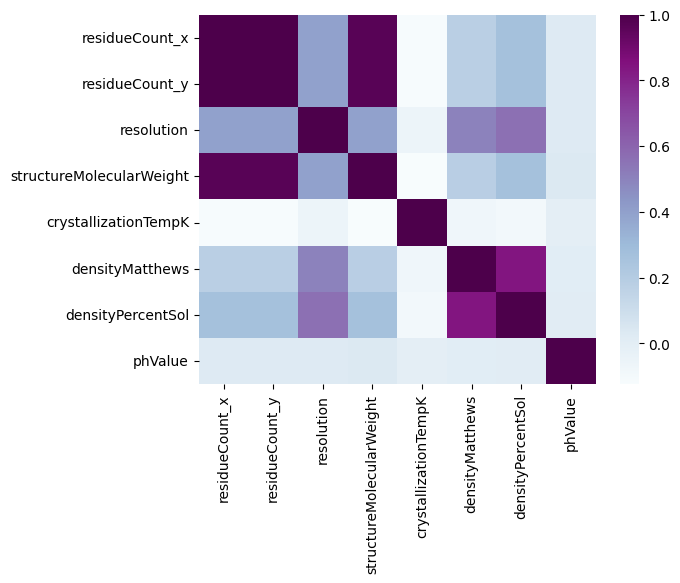

In [15]:
import seaborn as sns
# Making a correlation plot
sns.heatmap(df_new.corr(), cmap='BuPu')

(264224, 10)

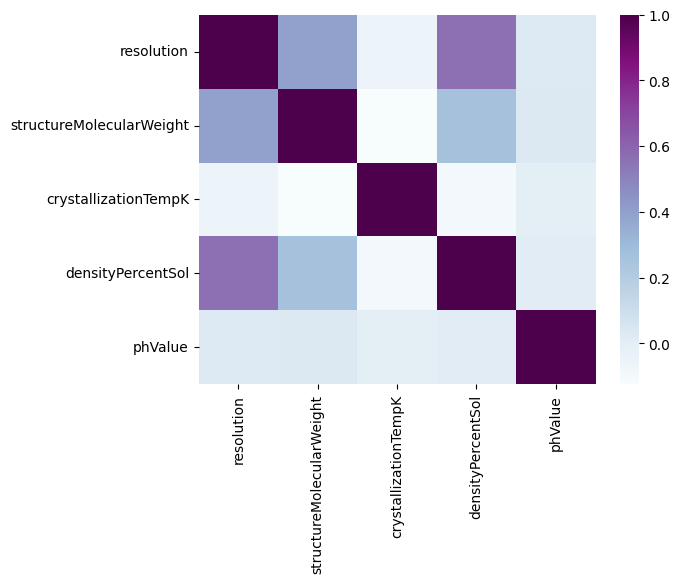

In [16]:
# Removing correlated features: residueCount and densityMatthews
df4 = df_new.drop(['residueCount_x', 'residueCount_y','densityMatthews'],axis=1)
# Making the new heatmap now
sns.heatmap(df4.corr(),cmap='BuPu')
df4.shape

<h2><b>Data Preprocessing</b><h2>

2762


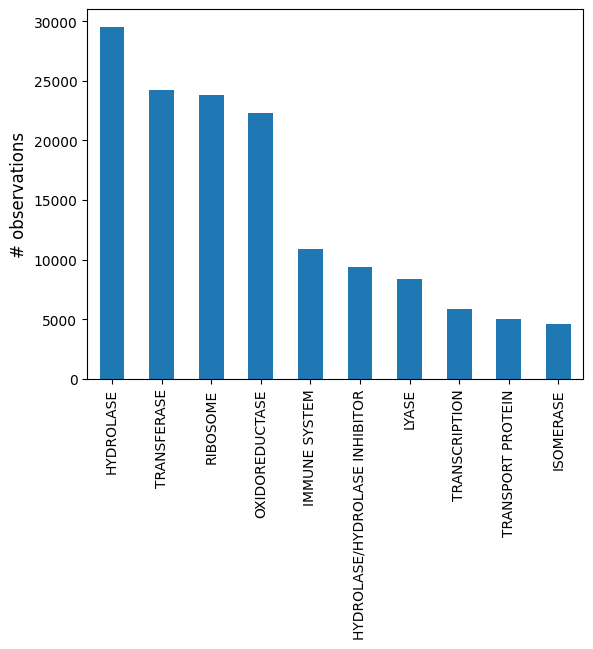

In [17]:
import matplotlib.pyplot as plt
# Plot the 10 most common families of proteins
df4['classification'].value_counts()[:10].plot(kind='bar')
#plt.xticks(rotation=45)
#plt.title("Top 10 most common protein families")
plt.ylabel("# observations", fontsize = 12)
#plt.xlabel("Protein Families", fontsize = 12)
print(df4.classification.nunique())

In [18]:
df_1 = df4['classification'].value_counts()[:10]
print(df_1)

HYDROLASE                        29559
TRANSFERASE                      24236
RIBOSOME                         23858
OXIDOREDUCTASE                   22287
IMMUNE SYSTEM                    10876
HYDROLASE/HYDROLASE INHIBITOR     9387
LYASE                             8354
TRANSCRIPTION                     5890
TRANSPORT PROTEIN                 5010
ISOMERASE                         4624
Name: classification, dtype: int64


In [19]:
# Selecting families with count > 15000
counts = df4.classification.value_counts()
class_data = np.asarray(counts[(counts > 15000)].index)
class_data = df4[df4.classification.isin(class_data)]
# Checking new dataframe for top protein family names
class_data.classification.value_counts()

HYDROLASE         29559
TRANSFERASE       24236
RIBOSOME          23858
OXIDOREDUCTASE    22287
Name: classification, dtype: int64

In [20]:
# Checking the size of new dataframe (essentially down to 25% of original data)
class_data.shape

(99940, 10)

In [22]:
# type of each columns
class_data.dtypes

sequence                     object
classification               object
experimentalTechnique        object
resolution                  float64
structureMolecularWeight    float64
crystallizationMethod        object
crystallizationTempK        float64
densityPercentSol           float64
pdbxDetails                  object
phValue                     float64
dtype: object

In [23]:
# Converting all the categorical features to numerical
from sklearn.preprocessing import OrdinalEncoder
cat_transformer = OrdinalEncoder()
cat_features = ['crystallizationMethod', 'experimentalTechnique','pdbxDetails','sequence', 'classification']
transformed_cat = cat_transformer.fit_transform(class_data[cat_features])
class_data[cat_features] = transformed_cat
class_data.head(10)

C:\Users\Dorsait.com\AppData\Local\Temp\ipykernel_11776\3217980868.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data[cat_features] = transformed_cat


,sequence,classification,experimentalTechnique,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityPercentSol,pdbxDetails,phValue
structureId,,,,,,,,,,
1A72,19585.0,1.0,4.0,2.60,40658.50,119.0,277.0,46.82,18151.0,8.40
1AR4,1616.0,1.0,4.0,1.90,45428.53,191.0,277.0,32.00,22390.0,6.10
1AR4,1616.0,1.0,4.0,1.90,45428.53,191.0,277.0,32.00,22390.0,6.10
1AR5,1616.0,1.0,4.0,1.60,45430.34,191.0,277.0,32.20,22394.0,6.15
1AR5,1616.0,1.0,4.0,1.60,45430.34,191.0,277.0,32.20,22394.0,6.15
1AUE,2174.0,3.0,4.0,2.33,24203.73,119.0,277.0,45.00,18510.0,8.00
1AUE,2174.0,3.0,4.0,2.33,24203.73,119.0,277.0,45.00,18510.0,8.00
1AUK,17964.0,0.0,4.0,2.10,52423.45,119.0,291.0,63.00,22391.0,5.40
1AVM,1616.0,1.0,4.0,1.55,45514.38,222.0,277.0,31.70,18467.0,6.15


<h2><b>EDA</b></h2>

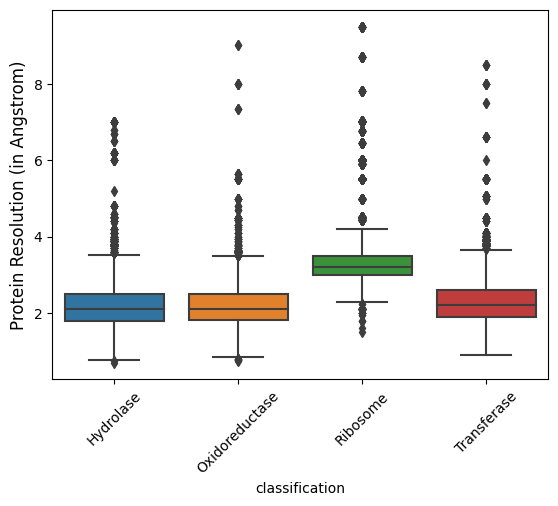

In [24]:
# Boxplot for visualizing the resolution feature
sns.boxplot(x=class_data["classification"], y=class_data["resolution"], data=pd.melt(class_data))
plt.ylabel("Protein Resolution (in Angstrom)", fontsize = 12)
#plt.xlabel("Protein Family", fontsize = 12)
#plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000], ["0", "1", "2", "3", "4", "5", "6", "7", "8"])
plt.xticks([0, 1, 2, 3], ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"], rotation = 45)
plt.show()

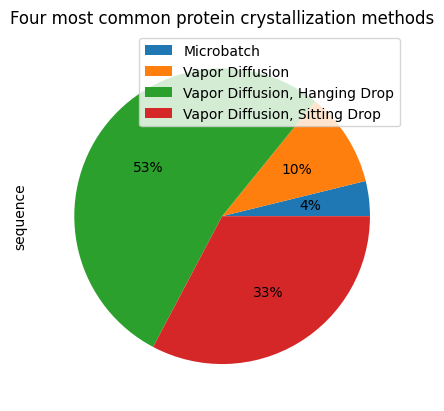

In [25]:
# Pie Chart for visualizing the top 4 most common protein crystallization methods
count = class_data.crystallizationMethod.value_counts(ascending = False)
top_count = np.asarray(count[(count > 1500)].index)
top_CM = class_data[class_data.crystallizationMethod.isin(top_count)]
fig = top_CM.groupby(['crystallizationMethod']).sum().plot(kind='pie', y = 'sequence' , autopct='%1.0f%%', labels = None)
plt.title("Four most common protein crystallization methods")
plt.legend(labels = ["Microbatch", "Vapor Diffusion", "Vapor Diffusion, Hanging Drop", "Vapor Diffusion, Sitting Drop"], loc = 1)

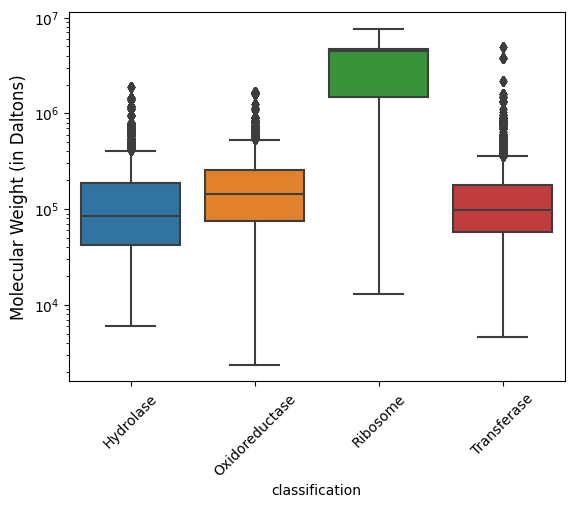

In [26]:
# Comparing the molecular weights of the top 4 protein families using a boxplot
ax = sns.boxplot(x=class_data["classification"], y=class_data["structureMolecularWeight"], data=pd.melt(class_data))
ax.set_yscale('log')
plt.ylabel("Molecular Weight (in Daltons)", fontsize = 12)
#plt.xlabel("Protein Family")
plt.xticks([0, 1, 2, 3], ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"], rotation = 45)
#plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000], ["0", "1", "2", "3", "4", "5", "6", "7", "8"])
plt.show()

<h2><b>Building KNN model: Feature selection</b></h2>

In [27]:
# Build a classification model for this new dataframe (top 3 protein families)
# Scale y ?
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
standard_scaler = StandardScaler()
X = class_data.drop(['classification', 'experimentalTechnique','pdbxDetails', "resolution", "densityPercentSol"],axis=1) 
y = class_data.classification # Classes: 0-3
X_minmax = standard_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=42)# are these good options?
print(X.columns)

Index(['sequence', 'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'phValue'],
      dtype='object')


c:\Users\Dorsait.com\pythonEnv\MLEnv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


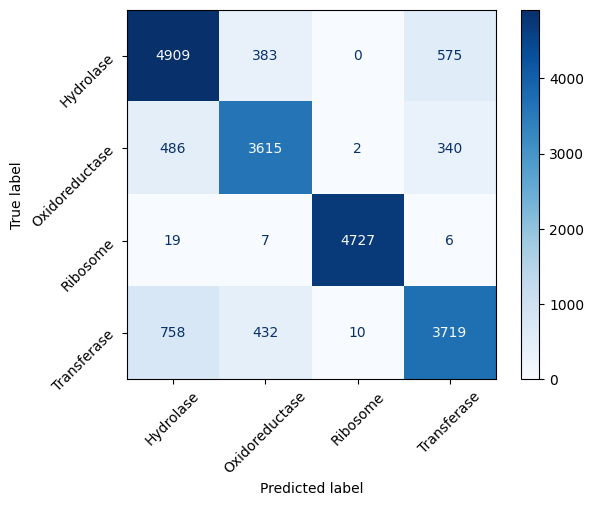

                precision    recall  f1-score   support

     Hydrolase       0.80      0.84      0.82      5867
Oxidoreductase       0.81      0.81      0.81      4443
      Ribosome       1.00      0.99      1.00      4759
   Transferase       0.80      0.76      0.78      4919

      accuracy                           0.85     19988
     macro avg       0.85      0.85      0.85     19988
  weighted avg       0.85      0.85      0.85     19988



In [28]:
# Building model w/ K=5 since it is the most commomly used K value
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Assessing the initial knn model's performance
y_pred = knn.predict(X_test)
#score = metrics.accuracy_score(y_test, y_pred)
#print("knn model accuracy: %0.3f" % score)

plot_confusion_matrix(knn,X_test,y_test,cmap=plt.cm.Blues, values_format = '.5g', display_labels = ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

print(classification_report(y_test, y_pred, target_names=["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"]))

In [29]:
# Usig GridSearchCV to find the best k values
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

params = {'n_neighbors': np.arange(1,25,1) }
clf = GridSearchCV(knn, params, cv=10)
clf.fit(X_train,y_train)

print(clf.best_score_)

0.936874561420798


In [30]:
# Find the best k parameter
print("The best k parameter is : " + str(clf.best_params_))
print("Accuracy: " + str(clf.best_estimator_.score(X_test, y_test)))

The best k parameter is : {'n_neighbors': 1}
Accuracy: 0.9479687812687613


Text(0, 0.5, 'Mean Error')

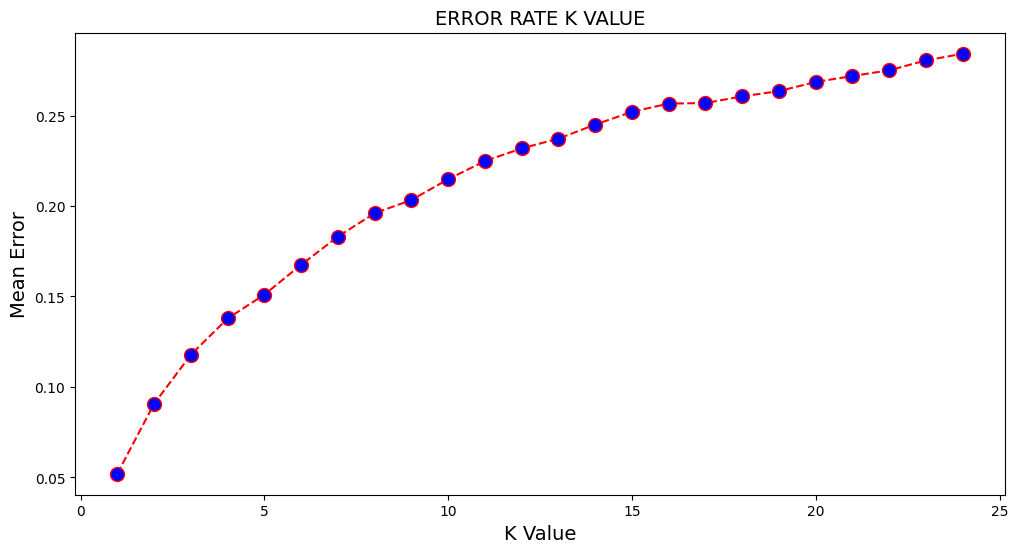

In [31]:
# Calculating error for K values between 1 and 25
error = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('ERROR RATE K VALUE',fontsize = 14 )
plt.xlabel('K Value', fontsize = 14 )
plt.ylabel('Mean Error', fontsize = 14 )

c:\Users\Dorsait.com\pythonEnv\MLEnv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


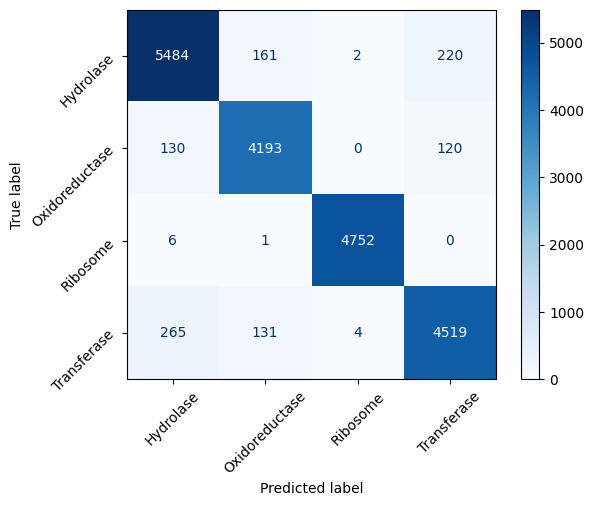

                precision    recall  f1-score   support

     Hydrolase       0.93      0.93      0.93      5867
Oxidoreductase       0.93      0.94      0.94      4443
      Ribosome       1.00      1.00      1.00      4759
   Transferase       0.93      0.92      0.92      4919

      accuracy                           0.95     19988
     macro avg       0.95      0.95      0.95     19988
  weighted avg       0.95      0.95      0.95     19988



In [32]:
# Based on the above graph, K=1 gives us the lowest mean error (5 features finally!)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
plot_confusion_matrix(knn1,X_test,y_test,cmap=plt.cm.Blues,values_format = '.5g', display_labels = ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


# Assessing the initial knn model's performance
y_pred = knn1.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"]))

<h2><b>Building Random Forest Model</b></h2>

In [37]:
# Feature Selection
standard_scaler = StandardScaler()
X = class_data.drop(['classification', 'experimentalTechnique','pdbxDetails', "resolution", "densityPercentSol"],axis=1) 
y = class_data.classification # Classes: 0-3
X_minmax = standard_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=42)# are these good options?
print(X.columns)

Index(['sequence', 'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'phValue'],
      dtype='object')


c:\Users\Dorsait.com\pythonEnv\MLEnv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


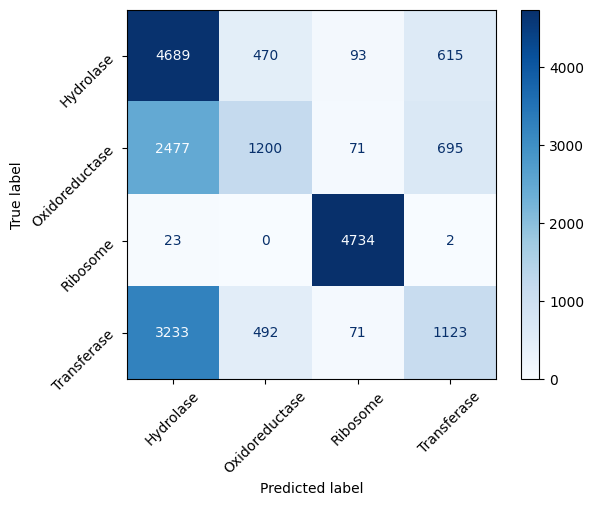

                precision    recall  f1-score   support

     Hydrolase       0.45      0.80      0.58      5867
Oxidoreductase       0.56      0.27      0.36      4443
      Ribosome       0.95      0.99      0.97      4759
   Transferase       0.46      0.23      0.31      4919

      accuracy                           0.59     19988
     macro avg       0.60      0.57      0.55     19988
  weighted avg       0.60      0.59      0.56     19988



In [38]:
from sklearn.ensemble import RandomForestClassifier
rnd_forest = RandomForestClassifier(max_depth=5, random_state=10)
rnd_forest.fit(X_train, y_train)

# Assessing the initial knn model's performance
y_pred = rnd_forest.predict(X_test)
#score = metrics.accuracy_score(y_test, y_pred)
#print("knn model accuracy: %0.3f" % score)

plot_confusion_matrix(rnd_forest,X_test,y_test,cmap=plt.cm.Blues, values_format = '.5g', display_labels = ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

print(classification_report(y_test, y_pred, target_names=["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"]))

Text(0, 0.5, 'Mean Error')

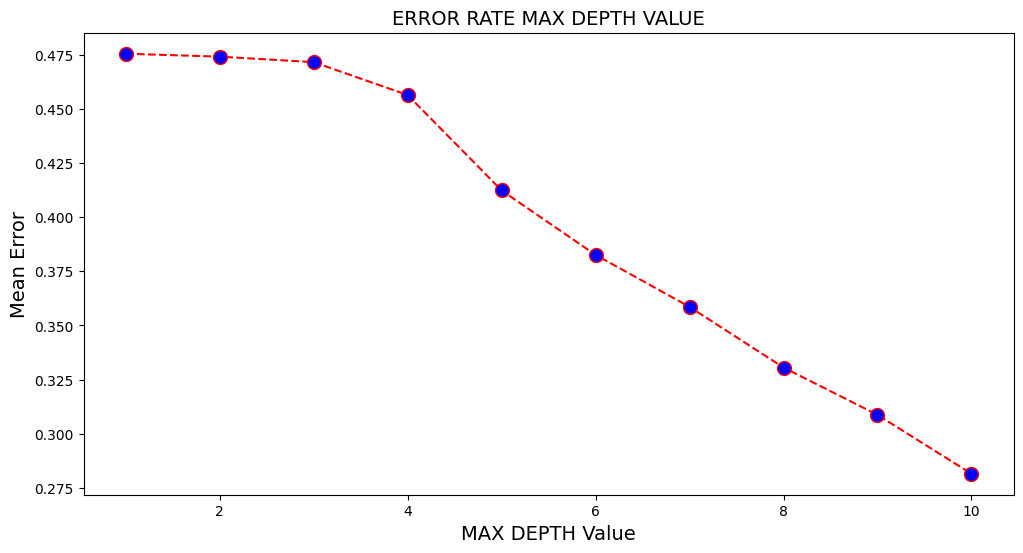

In [40]:
# Calculating error for max_depth values between 1 and 10
error = []
for i in range(1,11):
    rnd_forest = RandomForestClassifier(max_depth=i, random_state=10)
    rnd_forest.fit(X_train,y_train)
    pred_i = rnd_forest.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('ERROR RATE MAX DEPTH VALUE',fontsize = 14 )
plt.xlabel('MAX DEPTH Value', fontsize = 14 )
plt.ylabel('Mean Error', fontsize = 14 )

c:\Users\Dorsait.com\pythonEnv\MLEnv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


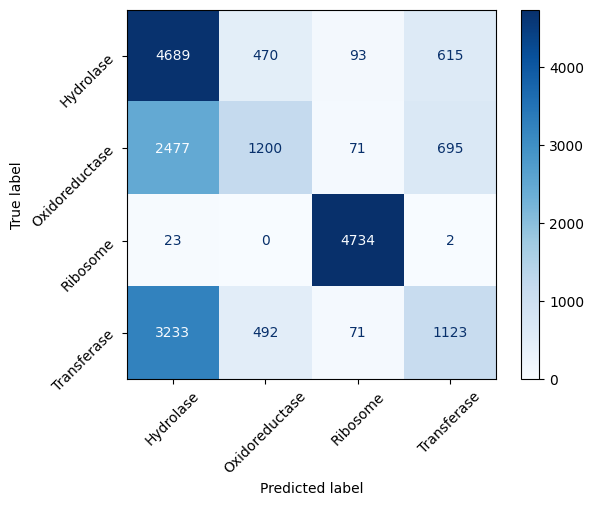

                precision    recall  f1-score   support

     Hydrolase       0.45      0.80      0.58      5867
Oxidoreductase       0.56      0.27      0.36      4443
      Ribosome       0.95      0.99      0.97      4759
   Transferase       0.46      0.23      0.31      4919

      accuracy                           0.59     19988
     macro avg       0.60      0.57      0.55     19988
  weighted avg       0.60      0.59      0.56     19988



In [41]:
# Based on the above graph, max_depth=10 gives us the lowest mean error
rnd_forest = RandomForestClassifier(max_depth=5, random_state=10)
rnd_forest.fit(X_train, y_train)

plot_confusion_matrix(rnd_forest,X_test,y_test,cmap=plt.cm.Blues,values_format = '.5g', display_labels = ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


# Assessing the initial knn model's performance
y_pred = rnd_forest.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"]))